# Loading images from the Quick Draw Dataset 5k examples


get the data at https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap?pli=1


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import keras
#from keras.datasets import cifar10
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
#import keras.backend as K

import tensorflow as tf

import os
#import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
print(keras.__version__)
print(tf.__version__)

2.0.8
1.3.0


In [3]:
num_examples_per_class = 5000

classes = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',
      'banana','bandage','barn','baseball bat','baseball','basket',
      'basketball','bathtub','beach','bear','beard','bed','bee','belt',
     'bicycle','binoculars','birthday cake','blueberry','book',
      'boomerang','bottlecap','bowtie','bracelet','brain','bread','broom',
      'bulldozer','bus','bush','butterfly','cactus','cake','calculator',
      'calendar','camel','camera','campfire','candle','cannon','canoe',
      'car','carrot','cello','computer','cat','chandelier','clock','cloud',
      'coffee cup','compass','cookie','couch','cow','crab',
      'crayon','crocodile','crown','cup','diamond','dog','dolphin',
      'donut','dragon','dresser','drill','drums','duck','dumbbell','ear',
      'elbow','elephant','envelope','eraser','eye','eyeglasses','face',
      'fan','feather','fence','finger','fire hydrant','fireplace','firetruck',
      'fish','flamingo','flashlight','flip flops','floor lamp',
      'flower','flying saucer','foot','fork']

In [4]:
len(classes)

100

In [5]:
classes40 = ['airplane','alarm clock','ambulance','angel','ant','anvil','apple','axe',
                  'banana','bandage','barn','baseball bat','baseball','basket',
                  'basketball','bathtub','beach','bear','beard','bed','bee','belt',
                  'bicycle','binoculars','birthday cake','blueberry',
                  'book','boomerang','bottlecap','bowtie','bracelet','brain',
                  'bread','broom','bulldozer','bus','bush','butterfly','cactus','cake']

In [6]:
classes60 = [x for x in classes if x not in classes40]

In [7]:
len(classes60)

60

## Load the image data from scratch

Only use if you are downloading the raw data and doing it yourself

In [8]:
#This cell is only if you are loading the data from scratch
# get the data 
quickdraws = [np.load("../../data/{}.npy".format(qdraw))[:num_examples_per_class] for qdraw in classes]

# Concat the arrays together
x_data = np.concatenate(quickdraws,axis=0)

x_data.shape

FileNotFoundError: [Errno 2] No such file or directory: '../../data/airplane.npy'

In [9]:
np.save('x_data_100_classes_5k.npy',x_data)

NameError: name 'x_data' is not defined

## Use this cell to load the premade datasets that I made

In [9]:
x_data = np.load("./x_data_100_classes_5k.npy")

In [10]:
x_data.shape

(500000, 784)

In [11]:
x_data = x_data[200000:]
x_data.shape

(300000, 784)

## Lets make some labels for our data

In [12]:
#labels = [np.full((num_examples_per_class,), classes.index(qdraw)) for qdraw in classes if qdraw in classes60]

## Concat the arrays together
#y_data = np.concatenate(labels,axis=0)
#y_data.shape

In [13]:
labels = [np.full((num_examples_per_class,), classes60.index(qdraw)) for qdraw in classes60]

## Concat the arrays together
y_data = np.concatenate(labels,axis=0)
y_data.shape

(300000,)

## lets look at the Images 

In [14]:
def show_object(obj):
    # Reshape 784 array into 28x28 image
    image = obj.reshape([28,28])
    fig, axes = plt.subplots(1, )
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.imshow(image, cmap='gray_r')
    plt.show()

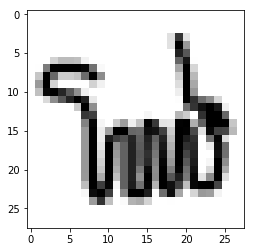

2


In [15]:
show_object(x_data[12345])
print(y_data[12345])

In [16]:
classes60[2]

'camel'

In [17]:
#shuffling function
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [18]:
x_data,y_data = unison_shuffled_copies(x_data,y_data)

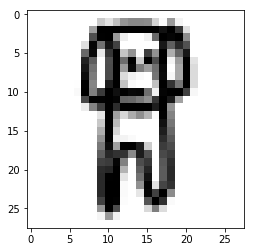

27


In [19]:
eg = 11

show_object(x_data[eg])
print(y_data[eg])

In [20]:
classes60[27]

'dog'

# Load Model

In [21]:
base_model = load_model('a2-40b.h5')

In [22]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
__________

In [23]:
base_model.layers.pop()

In [24]:
base_model.layers.pop()

In [25]:
base_model.layers.pop()

In [26]:
base_model.layers.pop()

In [27]:
base_model.layers.pop()

In [28]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
Conv_01 (Conv2D)             (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_02 (Conv2D)             (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_01 (MaxPooling2D)    (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_01 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
Conv_03 (Conv2D)             (None, 10, 10, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
__________

In [29]:
base_model.layers[-1].name

'MaxPool_02'

In [30]:
vector_out = base_model.get_layer('MaxPool_02')

In [31]:
feature_model = Model(inputs=base_model.input, outputs=vector_out.output)

## prep data

In [32]:
img_rows, img_cols = 28, 28
x_data.shape, y_data.shape

((300000, 784), (300000,))

In [47]:
x_imsrch = x_data[:10000]
y_imsrch = y_data[:10000]

In [48]:
x_imsrch.shape

(10000, 784)

In [49]:
def image_to_vector(x):
    #img_path = os.path.join(image_path, image_name)
    #x = image.load_img(img_path, target_size=(299, 299))
    #x = image.img_to_array(x)
    #x = x.reshape(1,299,299,3)
    preds = feature_model.predict(x)
    preds = preds.flatten()
    return preds

In [50]:
features = []


for x_im in x_imsrch:
    #print(file_name)
    x_im = x_im.reshape(1, img_rows, img_cols, 1)
    vec = image_to_vector(x_im)
    vectorArray = np.array(vec)
    #record = (file_name,vectorArray)
    features.append(vectorArray)

In [51]:
len(features)

10000

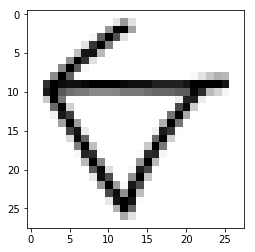

diamond


In [57]:
eg = 1111
temp_image_name = x_imsrch[eg]    #458 453 012 770 430
temp_image_name = temp_image_name.reshape(1, img_rows, img_cols, 1)
comparison_image = image_to_vector(temp_image_name)
show_object(temp_image_name)
print(classes60[y_imsrch[eg]])

In [58]:
# make a list of euclidian search scores against the image I am checking
search_scores = []

for feat in features:
    score = np.linalg.norm(feat-comparison_image)
    #score = 1 - distance.cosine(comparison_image, feat)
    search_scores.append(score)
    #print(score)
    
lowest = sorted(search_scores, key=float, reverse=False)
lowest[2]

16095.485

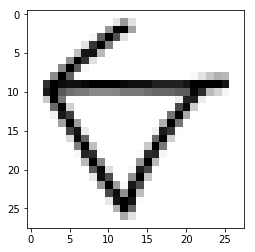

diamond
0.0


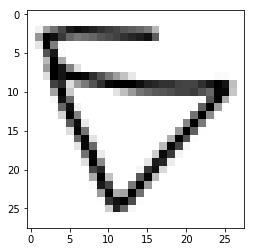

diamond
14614.3


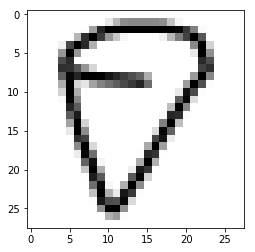

diamond
16095.5


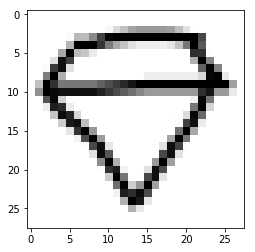

diamond
16105.0


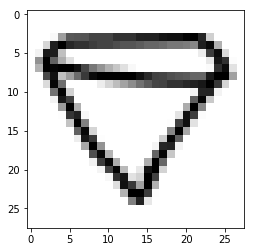

diamond
16325.6


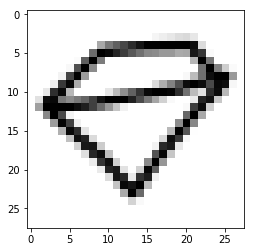

diamond
16730.1


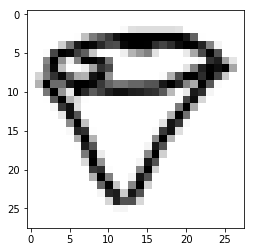

diamond
17298.2


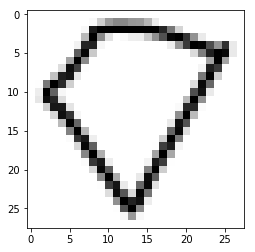

diamond
17594.9


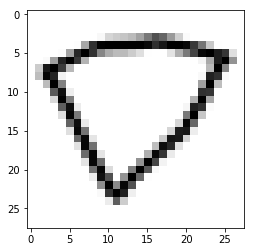

diamond
17900.6


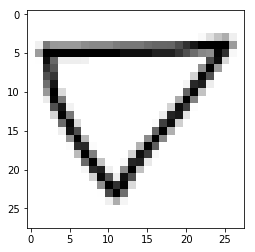

diamond
17950.5


In [59]:
for i in range(10):
    search_index = search_scores.index(lowest[i])
    #print(x_imsrch[search_index])
    show_object(x_imsrch[search_index])
    print(classes60[y_imsrch[search_index]])
    print(lowest[i])